In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #to visualize the data
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("Diwali Sales Data.csv", encoding = 'unicode escape') #used unicode escape to avoid potential errors

In [4]:
df.shape

(11251, 15)

In [20]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


#DATA CLEANING

In [25]:
df.drop(['Status', 'unnamed1'], axis =1, inplace = True) #to delete the blank columns

KeyError: "['Status', 'unnamed1'] not found in axis"

In [27]:
df.info() #blank columns have been removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [30]:
pd.isnull(df).sum() #to check the null values

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [31]:
df.dropna(inplace =True) #to drop null values

In [33]:
df['Amount']= df['Amount'].astype('int') #to change "AMOUNT" datatype from float -> int

In [35]:
df['Amount'].dtypes


dtype('int32')

In [36]:
df.describe() #it is used to describe the data i.e showing min,max,count,mean,percentile,etc..

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [38]:
df[['Age','Orders','Amount']].describe() #to describe specific columns

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


1. Gender


1.1 Plotting a graph to see the total count of the genders buying

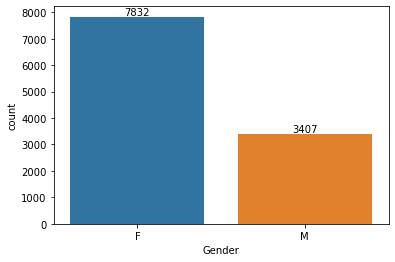

In [43]:
ax = sns.countplot(x= 'Gender', data =df) #plot a total count graph of the genders

for bars in ax.containers: #to label the graph
    ax.bar_label(bars) 

1.2 Plotting a graph to see the total amount of sales with respect to genders

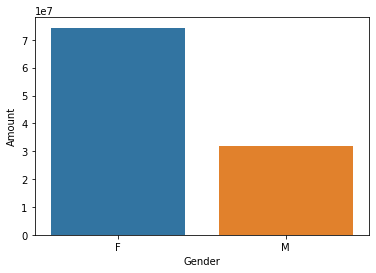

In [51]:
gender_total_sales= df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False) #to store the value based on required clause

px = sns.barplot(x ='Gender', y ='Amount', data = gender_total_sales) #to plot the graph


*From above two graphs we can conclude that the most of the buyers and females and also the purchasing power of females are higher than men.*

2. Age

2.1 Plotting a graph to look at the buyers age group based on their genders

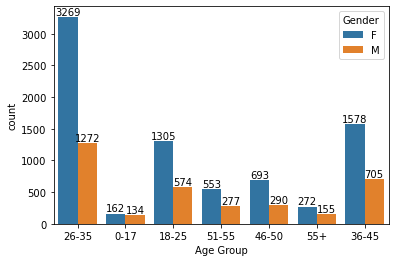

In [54]:
ax= sns.countplot(data = df, x= 'Age Group', hue = 'Gender') #here "HUE" is defined to make sure there's indication of gender among age groups

for bars in ax.containers: #to label the graph
    ax.bar_label(bars) 

2.2 Plotting the graph to see the total amount sales done in specific Age Groups

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

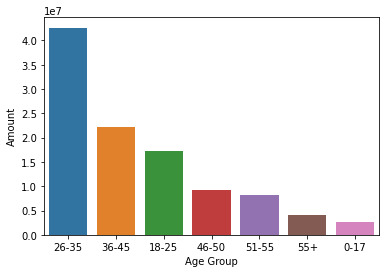

In [58]:
total_sales_age = df.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False) #storing values according to the clause

sns.barplot(x = 'Age Group', y='Amount', data = total_sales_age) #plotting bar graph and passing x-y values and Data

*From above two graphs we can conclude that most of the buyers are in the age-group "26-35" Females*

3. State

3.1 Plotting graph to see the Total number of Orders from the top 10 States

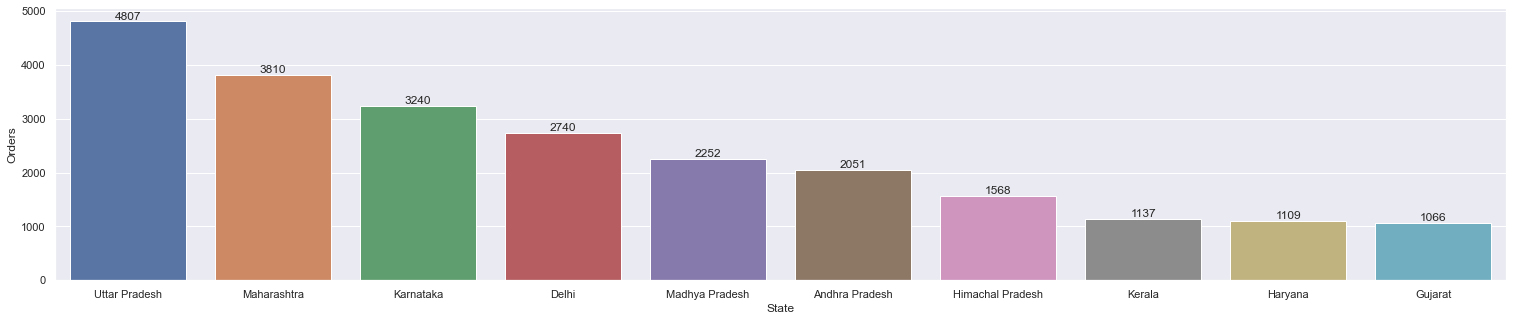

In [80]:
#.head() is used to show specific number of values; eg-> head(5)= shows top 5 values

sales_state = df.groupby(['State'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending= False).head(10) #storing values according to the clause

sns.set(rc={'figure.figsize':(26,5)}) #adjusting the width and height to manage the labelling of states

ax = sns.barplot(x='State', y='Orders', data= sales_state) #plotting bar graph and passing x-y values and Data

for bars in ax.containers: #to label the graph
    ax.bar_label(bars)

3.2 Plotting graph to see the top 10 States in terms of Total Sales

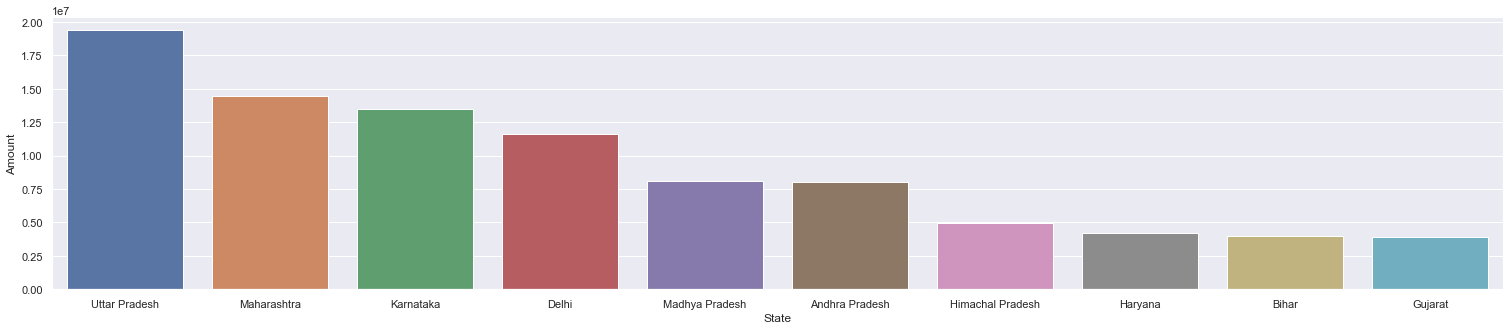

In [79]:
#.head() is used to show specific number of values; eg-> head(5)= shows top 5 values

sales_state = df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10) #storing values according to the clause

sns.set(rc={'figure.figsize':(26,5)}) #adjusting the width and height to manage the labelling of states

ax = sns.barplot(x='State', y='Amount', data= sales_state) #plotting bar graph and passing x-y values and Data


*From above to graphs we can conclude that most of the orders and total sales are from the states Uttar Pradesh, Maharashtra and Karnataka*

4. Marital Status

4.1 Plotting a graph to see the count of buyers who are Married-Unmarried

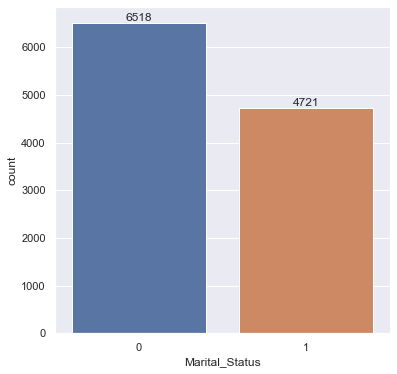

In [86]:
sns.set(rc={'figure.figsize':(6,6)}) #adjusting the width and height to manage the labelling

ax = sns.countplot(data = df, x= 'Marital_Status') #plotting graph to count the total

for bars in ax.containers: #to label the bars
    ax.bar_label(bars)

4.2 Plotting graph to see the buyers according to their Marital Status based on their genders

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

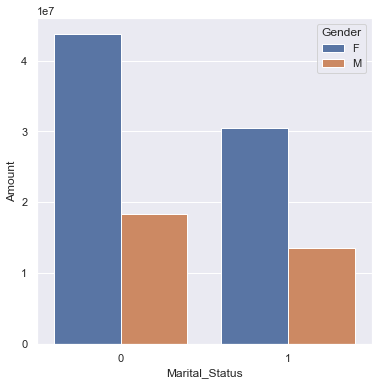

In [88]:
sales_mstatus_gender = df.groupby(['Marital_Status', 'Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False) #storing values according to the clause

sns.barplot(x="Marital_Status", y="Amount", data= sales_mstatus_gender, hue= 'Gender') #here "HUE" is defined to make sure there's indication of gender among age groups

*From above two graphs we can conclude that most of the buyers are married (women) also having high purchasing power*

5. Occupation

5.1 Plotting a graph to see the total count of the buyer's occupation 

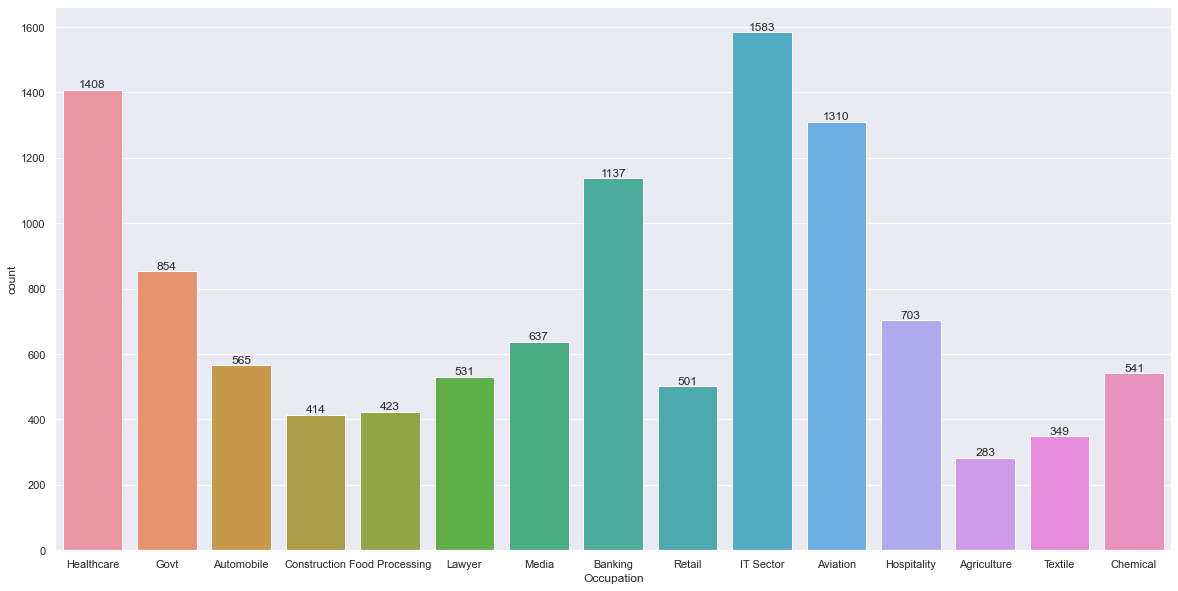

In [92]:
sns.set(rc={'figure.figsize':(20,10)}) #adjusting the width and height to manage the labelling

ax = sns.countplot(data = df, x= 'Occupation')  #plotting graph to count the total

for bars in ax.containers: #to label the bars
    ax.bar_label(bars)

5.2 Plotting graph to see the total amount of sales contributed by the Top 10 Occupations

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

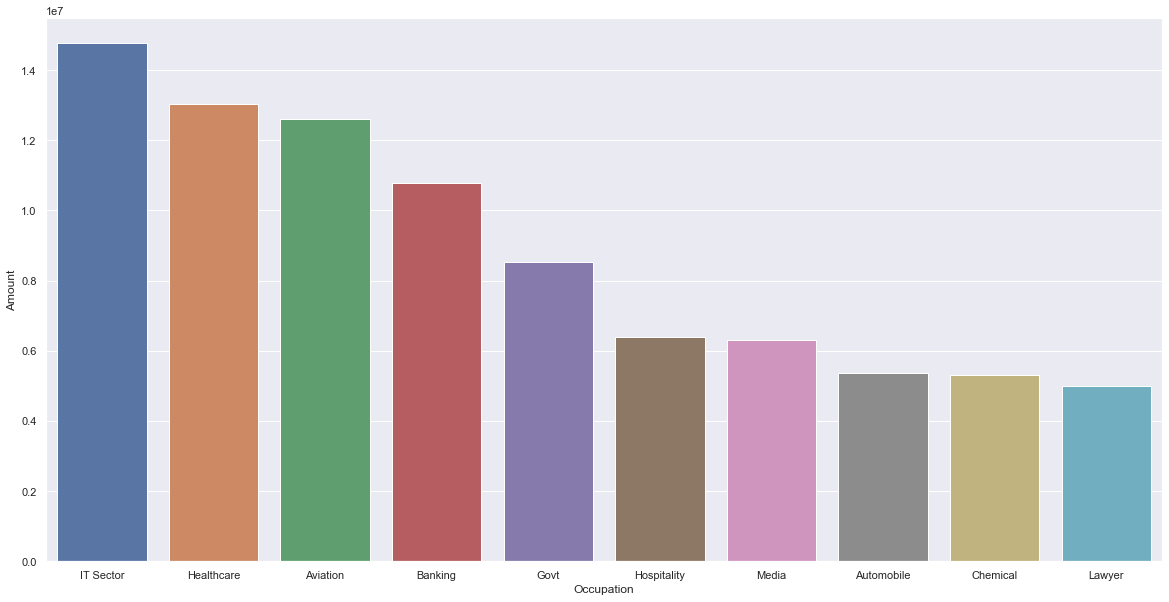

In [95]:
total_sales_occupation= df.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10) #storing values according to the clause

sns.barplot(x= 'Occupation', y='Amount', data= total_sales_occupation) #plotting bar graph and passing x-y values and Data

*From above two graphs we can conclude that the most of the buyers are working in the IT Sector, Healthcare & Aviation Occupations*

6. Product Category

6.1 Plotting graph to see the Product Category in total Sales

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

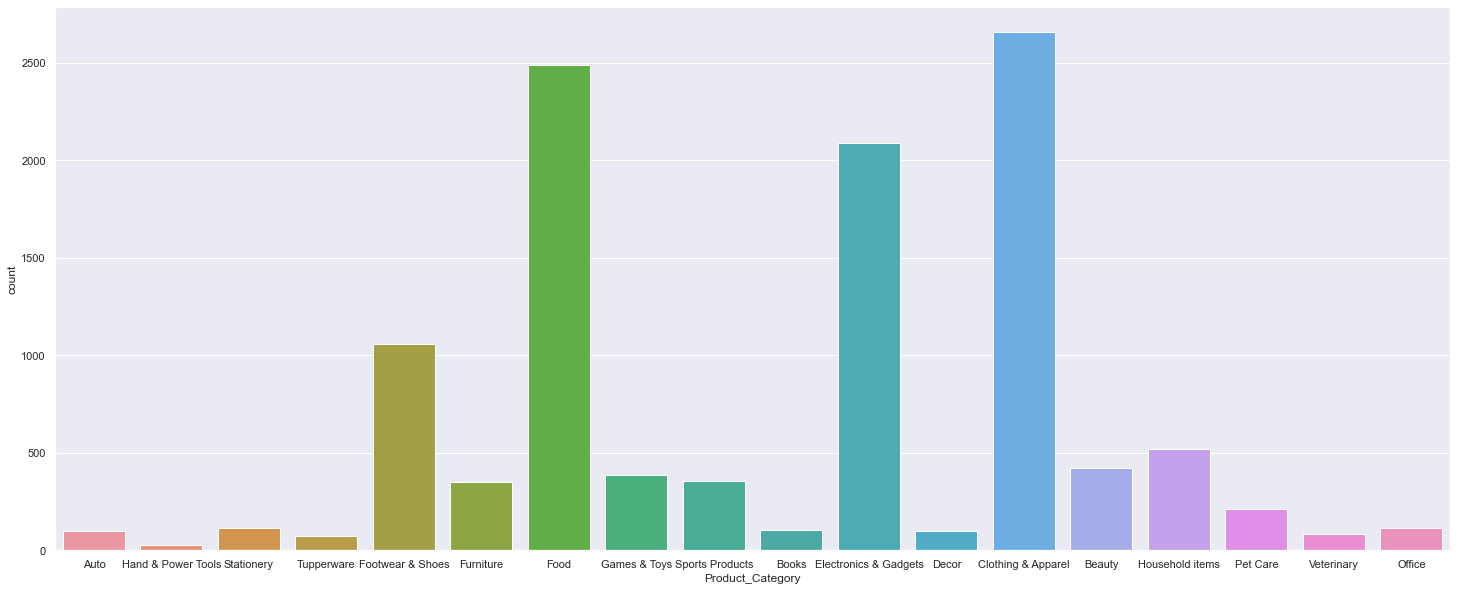

In [100]:
sns.set(rc={'figure.figsize':(25,10)}) #adjusting the width and height to manage the labelling

sns.countplot(data = df, x ='Product_Category')   #plotting graph to count the total

6.2 Top 10 selling Product Category based on the Amount

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

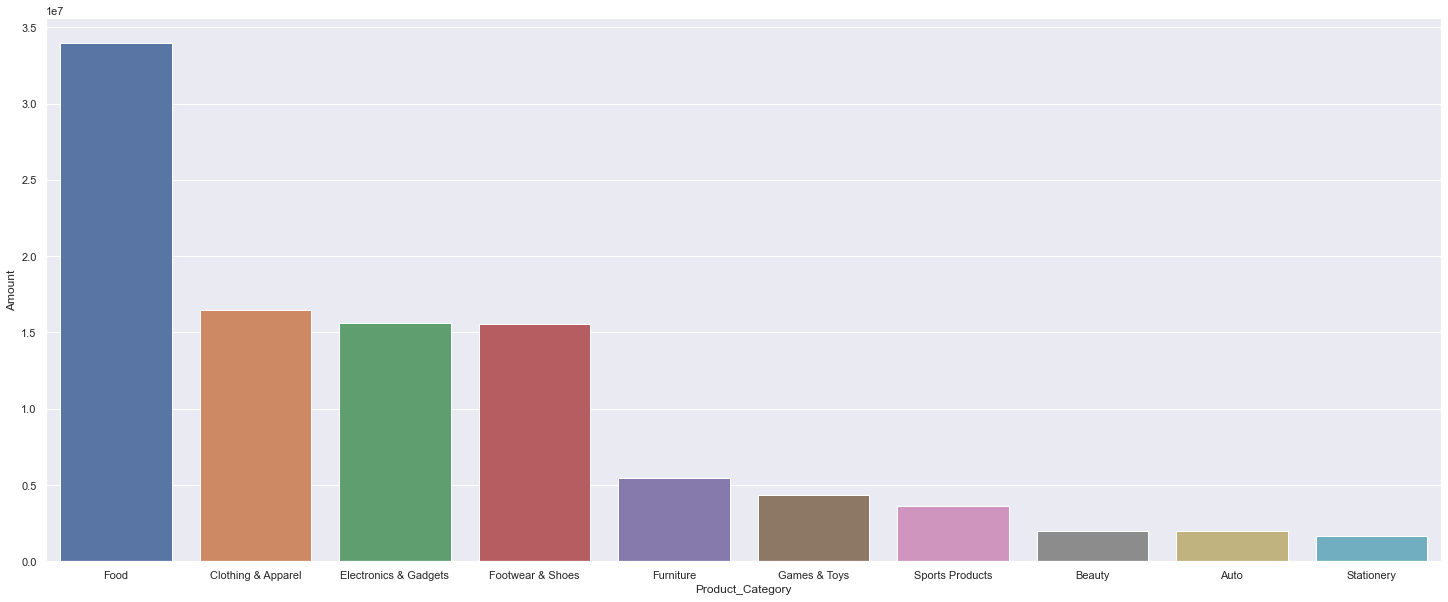

In [102]:
sales_category = df.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)

sns.barplot(x= 'Product_Category', y='Amount', data= sales_category)

*From above two graphs we can see that most of the products sold are from Food,Clothing,Electronics, and Footwear*

Conclusion:-


*In my Diwali Sales Data Analysis, I uncovered compelling insights:*

*A predominant female buyer base, particularly in the 26-35 age group, with higher purchasing power. Noteworthy sales emanated from key states such as Uttar Pradesh, Maharashtra, and Karnataka, predominantly driven by married women. The majority of buyers hailed from the IT sector, healthcare, and aviation occupations, demonstrating their strong influence. Top-selling product categories encompassed Food, Clothing, Electronics, and Footwear, reflecting significant consumer preferences in these festive seasons.*